# Housing Price Prediction Case Study

## Multiple Linear Regression

### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

## Reading and Understanding the Data

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools

import scipy.stats as stats
from scipy.stats import ttest_ind, f_oneway, levene

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

In [2]:
function_path = os.path.abspath('C:\\Users\\jared\\Documents\\Python')
sys.path.append(function_path)
from Functions import *

In [3]:
housing = pd.read_csv("Housing.csv")

In [4]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing.shape

(545, 13)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
f_nuniques_var(housing, housing.columns)

area                284
price               219
bedrooms              6
bathrooms             4
stories               4
parking               4
furnishingstatus      3
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
dtype: int64

In [9]:
cat_var= f_cat_var(housing)
cat_var

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [10]:
num_var= f_num_var(housing)
num_var

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [11]:
f_val_cnt_m(housing, cat_var)

          count  proportion
mainroad                   
yes         468    0.858716
no           77    0.141284 

           count  proportion
guestroom                   
no           448    0.822018
yes           97    0.177982 

          count  proportion
basement                   
no          354    0.649541
yes         191    0.350459 

                 count  proportion
hotwaterheating                   
no                 520    0.954128
yes                 25    0.045872 

                 count  proportion
airconditioning                   
no                 373    0.684404
yes                172    0.315596 

          count  proportion
prefarea                   
no          417    0.765138
yes         128    0.234862 

                  count  proportion
furnishingstatus                   
semi-furnished      227    0.416514
unfurnished         178    0.326606
furnished           140    0.256881 



## Data Cleaning

In [12]:
# Checking Null values
housing.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

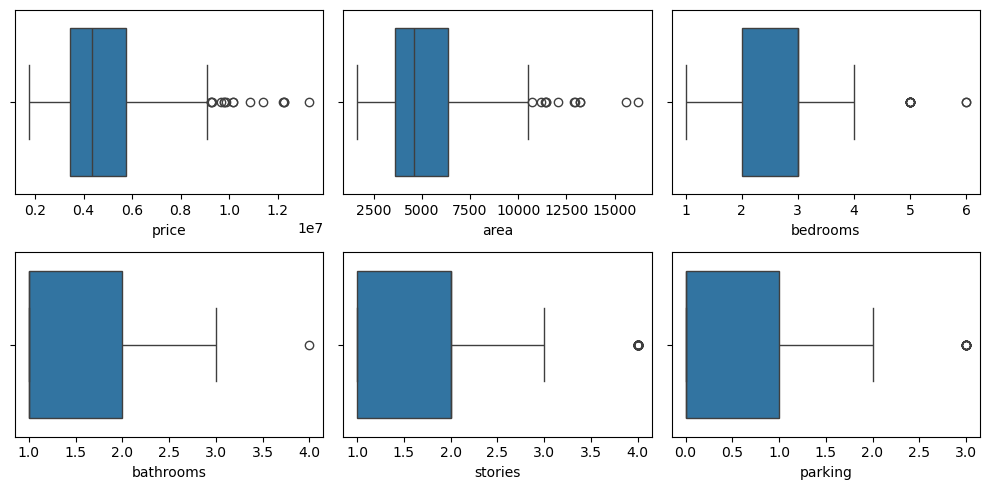

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

plt1 = sns.boxplot(x=housing['price'], ax=axs[0, 0])
plt2 = sns.boxplot(x=housing['area'], ax=axs[0, 1])
plt3 = sns.boxplot(x=housing['bedrooms'], ax=axs[0, 2])
plt4 = sns.boxplot(x=housing['bathrooms'], ax=axs[1, 0])
plt5 = sns.boxplot(x=housing['stories'], ax=axs[1, 1])
plt6 = sns.boxplot(x=housing['parking'], ax=axs[1, 2])

plt.tight_layout()
plt.show()

##### Outlier Treatment
- Price and area have considerable outliers.
- We can drop the outliers as we have sufficient data.

In [14]:
Q1_p = housing.price.quantile(0.25)
Q3_p = housing.price.quantile(0.75)
IQR_p = Q3_p - Q1_p
Low_lim_p= Q1_p - 1.5*IQR_p
Upp_lim_p= Q3_p + 1.5*IQR_p

print(f'Quantile 1: {Q1_p}')
print(f'Quantile 3: {Q3_p}')
print(f'Maximum price: {housing.price.max()}')
print(f'Interquartile range: {IQR_p}')
print(f'New price limits: {Low_lim_p, Upp_lim_p}')

Quantile 1: 3430000.0
Quantile 3: 5740000.0
Maximum price: 13300000
Interquartile range: 2310000.0
New price limits: (-35000.0, 9205000.0)


In [15]:
Q1_a = housing.area.quantile(0.25)
Q3_a = housing.area.quantile(0.75)
IQR_a = Q3_a - Q1_a
Low_lim_a= Q1_a - 1.5*IQR_a
Upp_lim_a= Q3_a + 1.5*IQR_a

print(f'Quantile 1: {Q1_a}')
print(f'Quantile 3: {Q3_a}')
print(f'Maximum area: {housing.area.max()}')
print(f'Interquartile range: {IQR_a}')
print(f'New price limits: {Low_lim_a, Upp_lim_a}')

Quantile 1: 3600.0
Quantile 3: 6360.0
Maximum area: 16200
Interquartile range: 2760.0
New price limits: (-540.0, 10500.0)


In [16]:
housing1= housing[(housing.price >= Low_lim_p) & (housing.price <= Upp_lim_p) & (housing.area >= Low_lim_a) & (housing.area <= Upp_lim_a)]

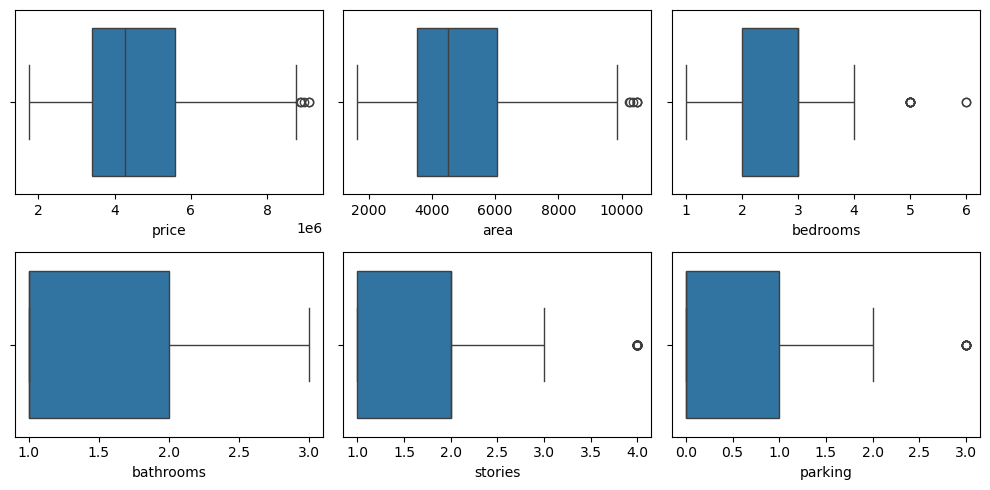

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

plt1 = sns.boxplot(x=housing1['price'], ax=axs[0, 0])
plt2 = sns.boxplot(x=housing1['area'], ax=axs[0, 1])
plt3 = sns.boxplot(x=housing1['bedrooms'], ax=axs[0, 2])
plt4 = sns.boxplot(x=housing1['bathrooms'], ax=axs[1, 0])
plt5 = sns.boxplot(x=housing1['stories'], ax=axs[1, 1])
plt6 = sns.boxplot(x=housing1['parking'], ax=axs[1, 2])

plt.tight_layout()
plt.show()

In [18]:
# Percentage difference between 'housing1' and 'housing'

df_sel= housing.describe().loc[['mean','std','min','max'], :]
df_sel1= housing1.describe().loc[['mean','std','min','max'], :]

describe_diff= df_sel1 / df_sel - 1
describe_diff= describe_diff.replace([np.inf, -np.inf], np.nan)
describe_diff= describe_diff.fillna(0)
round(describe_diff,2)

,price,area,bedrooms,bathrooms,stories,parking
mean,-0.04,-0.04,-0.01,-0.02,-0.01,-0.05
std,-0.15,-0.16,-0.01,-0.07,-0.00,-0.02
min,0.00,0.00,0.00,0.00,0.00,0.00
max,-0.32,-0.35,0.00,-0.25,0.00,0.00


In [19]:
len(housing1) / len(housing) - 1 #The amount of data was reduced by 4.6%

-0.04587155963302747

In [20]:
f_df_correlations(housing, num_var)

,Variable1,Variable2,Correlation
1,price,area,0.535997
3,price,bathrooms,0.517545
4,price,stories,0.420712
16,bedrooms,stories,0.408564
5,price,parking,0.384394
15,bedrooms,bathrooms,0.373930
2,price,bedrooms,0.366494
11,area,parking,0.352980
22,bathrooms,stories,0.326165
9,area,bathrooms,0.193820


In [21]:
f_df_correlations(housing1, num_var)

,Variable1,Variable2,Correlation
1,price,area,0.532442
3,price,bathrooms,0.468149
4,price,stories,0.441913
16,bedrooms,stories,0.407332
11,area,parking,0.354536
15,bedrooms,bathrooms,0.349242
2,price,bedrooms,0.333710
5,price,parking,0.322168
22,bathrooms,stories,0.308117
9,area,bathrooms,0.181311


## Exploratory Data Analytics

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

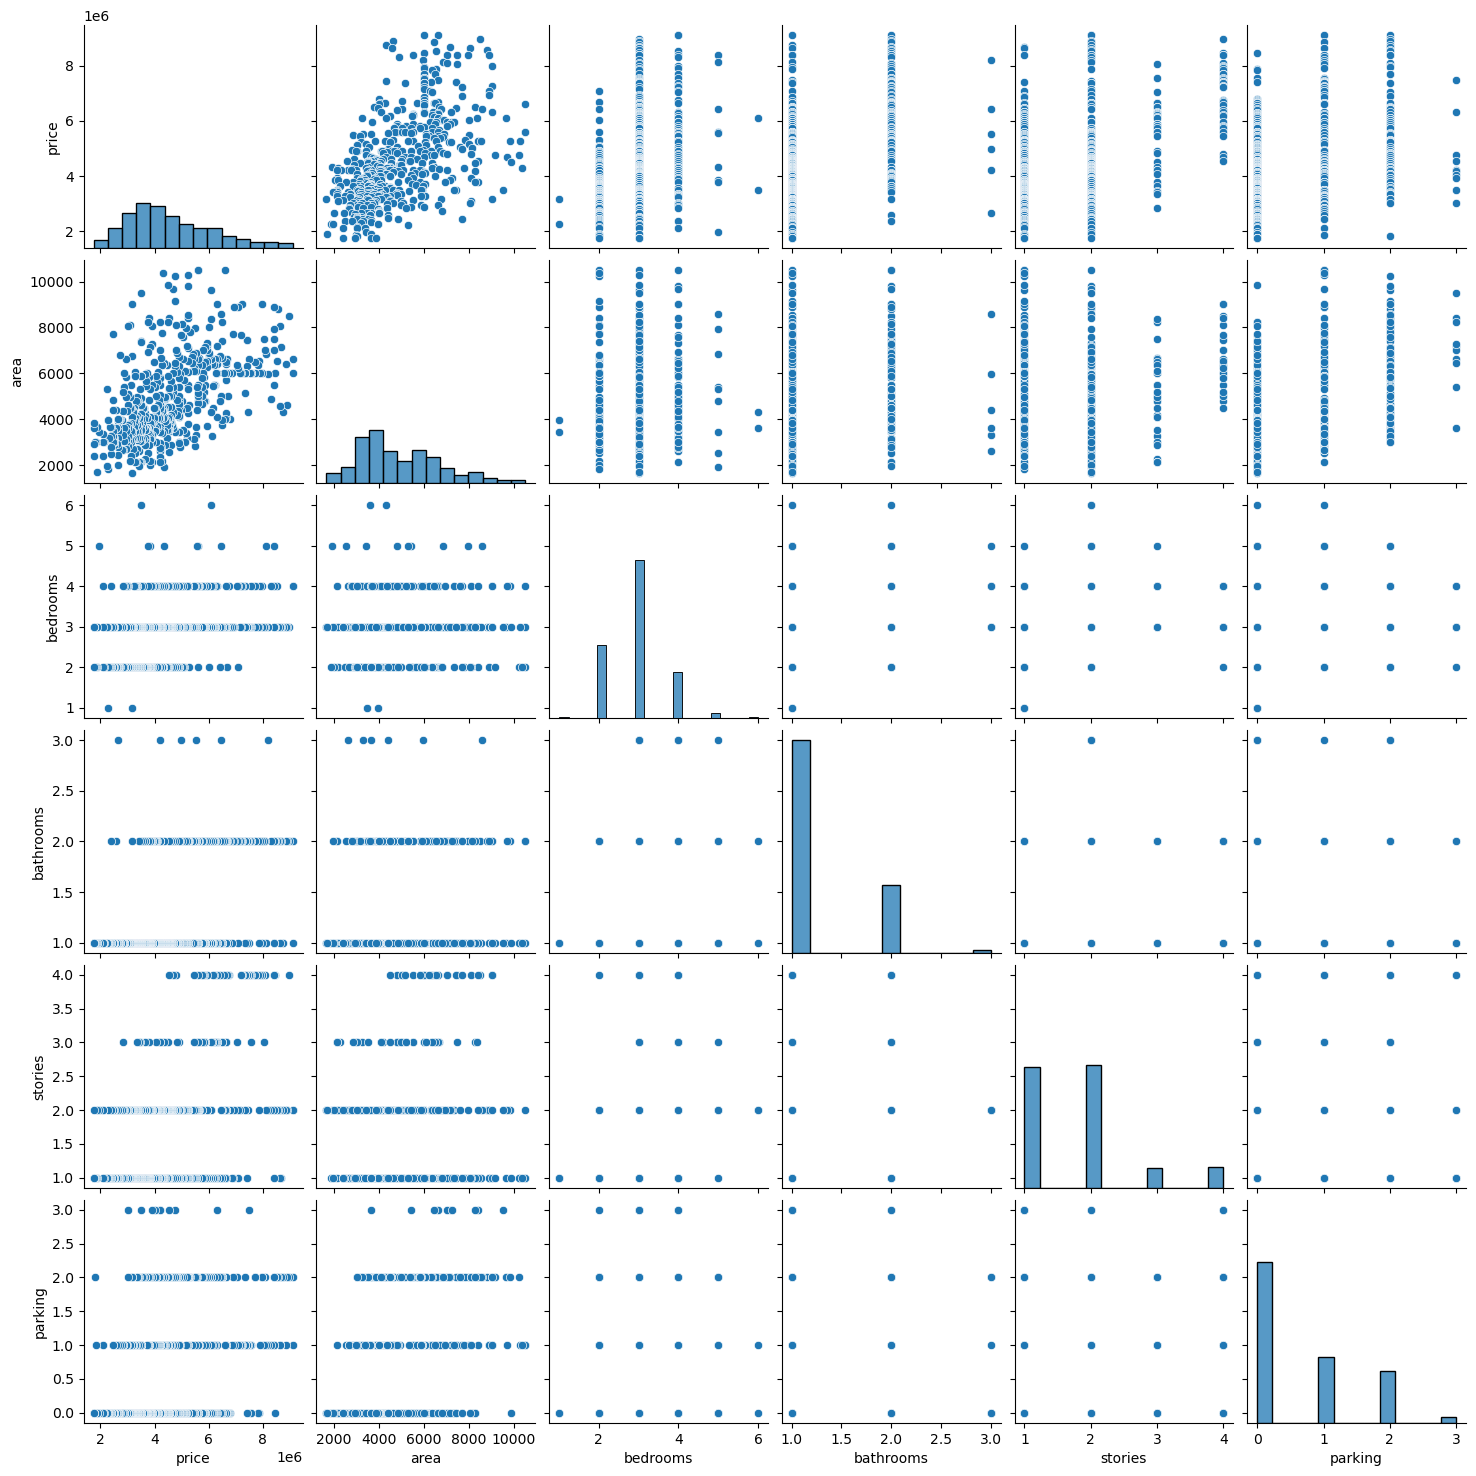

In [22]:
sns.pairplot(housing1)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

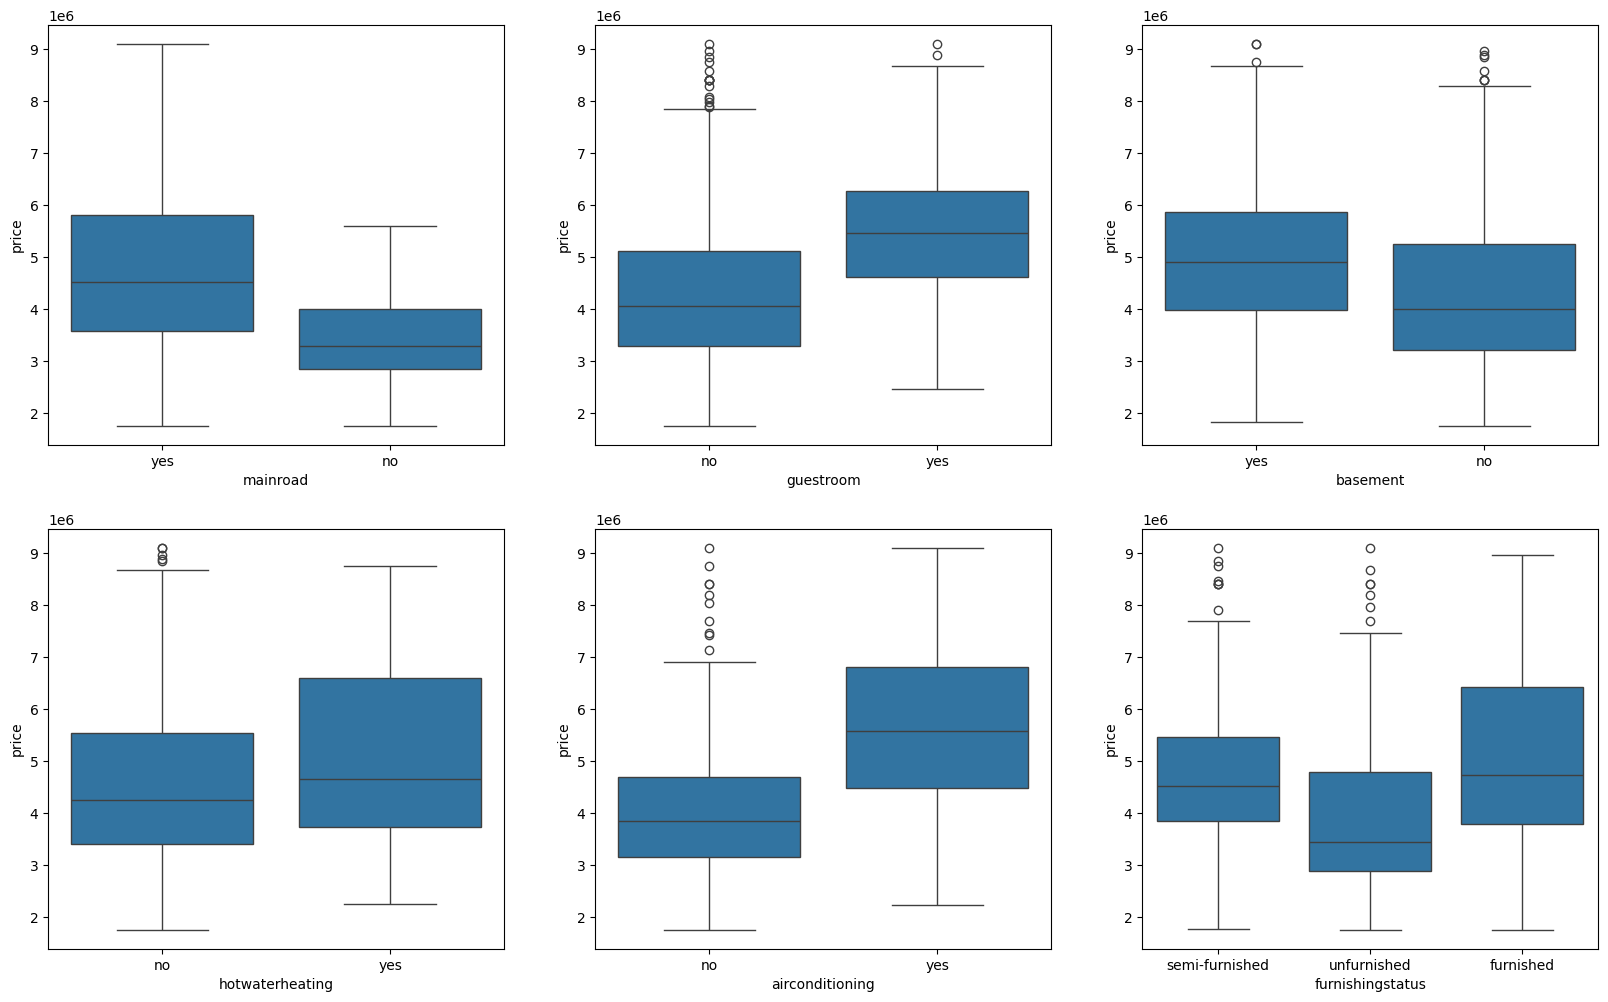

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing1)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing1)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing1)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing1)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing1)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing1)
plt.show()

In [24]:
df_ttest, rejected_vars = f_multiple_ttest_ind_v2(housing, var_list=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], target='price')

In [25]:
rejected_vars

[]

In [26]:
df_ttest

,variable,method,p_value_ttest,correlation
0,mainroad,Welch,3.632669e-25,yes
1,guestroom,Standard,1.429114e-09,yes
2,basement,Standard,1.104105e-05,yes
3,hotwaterheating,Standard,2.981524e-02,yes
4,airconditioning,Welch,2.803701e-22,yes
5,prefarea,Standard,2.718374e-15,yes


In [27]:
df_anova, rejected_vars = f_multiple_anova(housing, var_list=['furnishingstatus'], target='price')

In [28]:
df_anova

,variable,method,p_value_anova,correlation
0,furnishingstatus,Welch ANOVA,2.092867e-12,yes


In [29]:
rejected_vars

[]

## Data Preparation

### Dummy Variables

In [30]:
f_cat_var(housing)

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [31]:
f_num_var(housing)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [32]:
cat_var

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [33]:
num_var

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [34]:
df_dummies= pd.get_dummies(housing1[cat_var], drop_first= True, dtype= int)
df_model= pd.concat([housing1[num_var], df_dummies], axis=1)
df_model.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0


<Axes: >

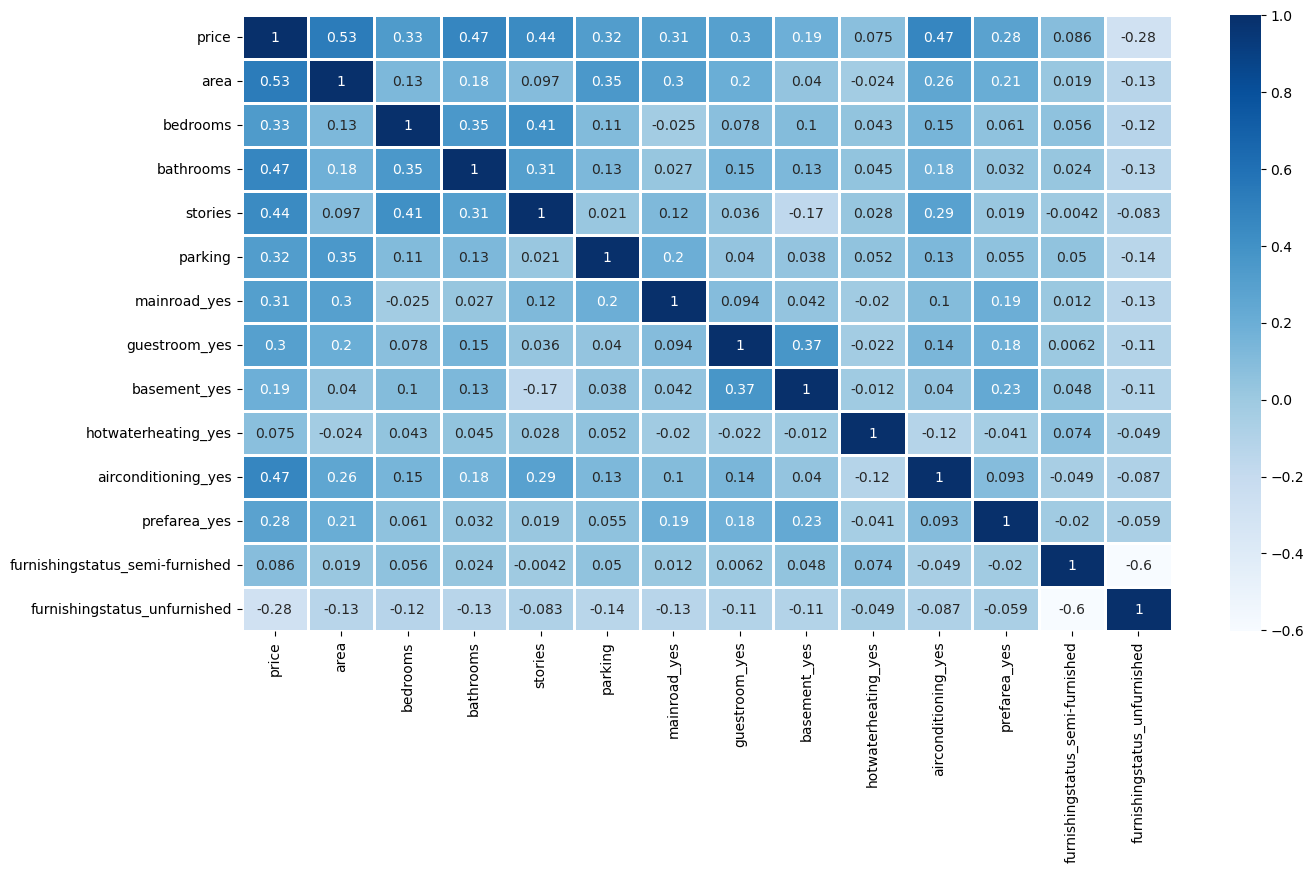

In [35]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df_model.corr(), annot=True, cmap='Blues', linecolor='white', linewidth=2 )

In [36]:
x_num_var= f_num_var(housing1,'price')
x_num_var

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [37]:
x, y= df_model.drop(['price'], axis= 1), df_model['price']

In [38]:
VIF= add_constant(x)
pd.DataFrame({'VIF': [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]}, 
             index= VIF.columns)

,VIF
const,35.218947
area,1.368751
bedrooms,1.347848
bathrooms,1.258528
stories,1.467443
parking,1.191195
mainroad_yes,1.180987
guestroom_yes,1.240527
basement_yes,1.323259
hotwaterheating_yes,1.032411


In [39]:
x_train, x_test, y_train, y_test= train_test_split(x,
                                            y,
                                            train_size= 0.7,
                                            random_state= 100)

In [40]:
scaler= StandardScaler()
#Fitting the scaler ONLY in the training set
x_train[x_num_var]= scaler.fit_transform(x_train[x_num_var])
x_train.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
36,1.449600,0.080753,1.605210,1.348555,0.374255,1,0,0,1,0,1,0,0
534,-1.052383,1.480474,-0.558851,0.217509,-0.760985,1,0,0,0,0,0,0,1
409,-0.949111,-1.318967,-0.558851,-0.913537,1.509496,1,0,0,0,0,0,0,1
495,-0.494154,0.080753,-0.558851,0.217509,0.374255,1,0,0,0,0,0,0,1
254,-0.209457,1.480474,-0.558851,0.217509,1.509496,1,0,0,0,1,0,1,0


In [41]:
# Transform the validation set using the fitted scaler in the training set.
x_test[x_num_var]= scaler.transform(x_test[x_num_var])
x_test.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
328,-0.215039,0.080753,1.605210,0.217509,-0.760985,0,0,1,0,1,0,1,0
356,-1.320333,2.880194,1.605210,-0.913537,0.374255,0,0,1,0,1,0,0,0
97,0.845596,0.080753,-0.558851,-0.913537,0.374255,1,1,1,0,1,1,1,0
405,-1.018889,0.080753,-0.558851,-0.913537,-0.760985,1,0,0,0,0,0,0,1
540,-1.052383,-1.318967,-0.558851,-0.913537,1.509496,1,0,1,0,0,0,0,1


In [42]:
# Train the model on the scaled training set
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept= True, n_jobs= -1)
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [43]:
print('-----Preliminary scores-----')

print('Training score:', cross_val_score(model, x_train, y_train, cv= 5).mean())
print('Test score:', model.score(x_test, y_test))

-----Preliminary scores-----
Training score: 0.6064233256355905
Test score: 0.6763020339383196


In [44]:
print('B0', model.intercept_)

pd.DataFrame({'Variable': x_train.columns,
             'Betas': model.coef_})

B0 3841862.05384003


,Variable,Betas
0,area,506652.199557
1,bedrooms,23953.248357
2,bathrooms,299372.423159
3,stories,427517.596947
4,parking,152443.742730
5,mainroad_yes,291593.306460
6,guestroom_yes,218609.058004
7,basement_yes,356375.062678
8,hotwaterheating_yes,600673.225911
9,airconditioning_yes,659429.948178


In [45]:
scoring = {
    'r2': 'r2',
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)
}
# Para poder usar las métricas tenemos que importarlas
results= cross_validate(model, x_train, y_train, cv=5, scoring= scoring)

#print(f"Mean r2 score: {results['r2'].mean() * 100:.4f}%")
#print(f"Mean squared error: {results['neg_mean_squared_error'].mean() * 100:.4f}%")

mean_r2 = np.mean(results['test_r2'])
mean_mse = -np.mean(results['test_mse'])
mean_mae = -np.mean(results['test_mae'])

print('-----Training results-----')
print(f"Mean R2 (CV): {mean_r2 * 100:.4f}%")
print(f"Mean MSE (CV): {mean_mse:,.2f}")
print(f"Mean MAE (CV): {mean_mae:,.2f}")

-----Training results-----
Mean R2 (CV): 60.6423%
Mean MSE (CV): 911,861,740,115.54
Mean MAE (CV): 717,412.61


In [46]:
y_pred = model.predict(x_test)
r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('-----Test results-----')
print(f"R2: {r2 * 100:.4f}%")
print(f"MSE: {mse:,.2f}")
print(f"MAE: {mae:,.2f}")

-----Test results-----
R2: 67.6302%
MSE: 916,716,531,892.42
MAE: 706,374.48


<function matplotlib.pyplot.show(close=None, block=None)>

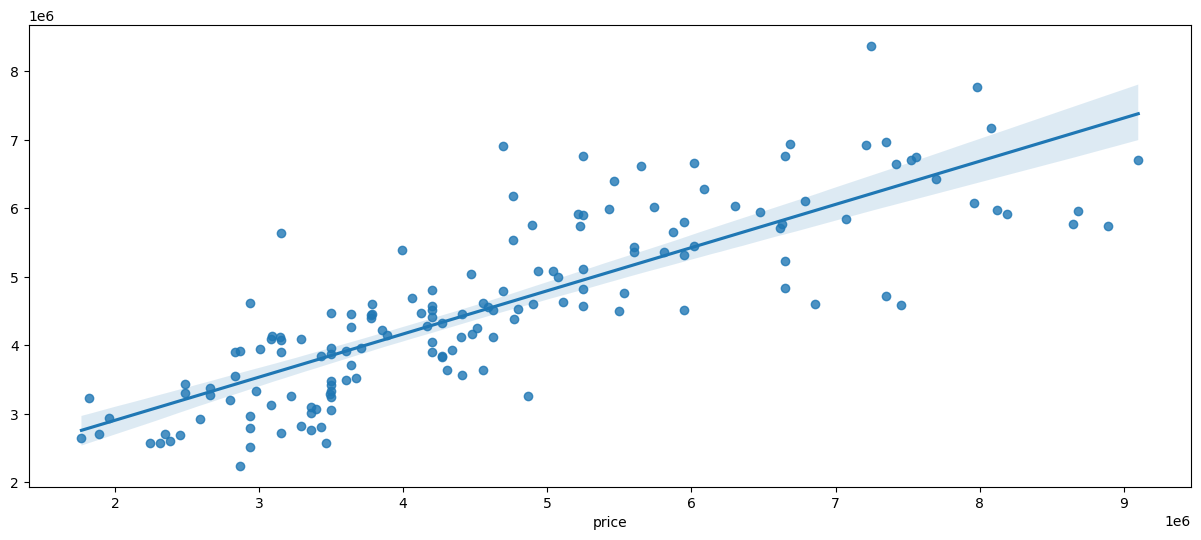

In [48]:
plt.figure(figsize= (15,6))
sns.regplot(x= y_test, y= y_pred)
plt.show